In [5]:
#Librerias necesarias para el desarrollo del notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from IPython.display import Audio 
from scipy.io.wavfile import read 
import scipy.signal as sp
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from matplotlib.pylab import *
F_muestreo = 44100
import time
import scipy.io as sio
from biosppy.signals import ecg

## Para crear el audio 

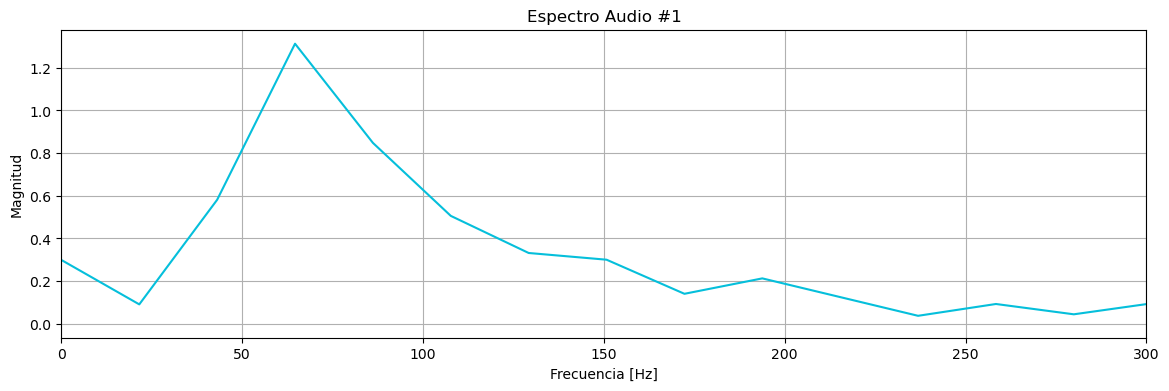

In [6]:
file_audio=('Ba111.wav') # Se selecciona el archivo a abrir.
fs_1, Audio_1=read(file_audio) # Se extrae la Fs y el contenido del audio.
Norm_Audio1 = Audio_1/max(abs(Audio_1)) # Se normaliza el audio.

N = 512*4

#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio1,H_audio1 = sp.freqz(Norm_Audio1,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize=(14,4))
plt.plot((W_audio1-np.pi)*fs_1/(2*np.pi),np.abs(np.fft.fftshift(H_audio1))/max(np.fft.fftshift(H_audio1)),color = '#05BFDB')
plt.axis(xmax=fs_1/2,xmin=-fs_1/2)
plt.title("Espectro Audio #1")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,300]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()

Audio(Norm_Audio1, rate=fs_1)

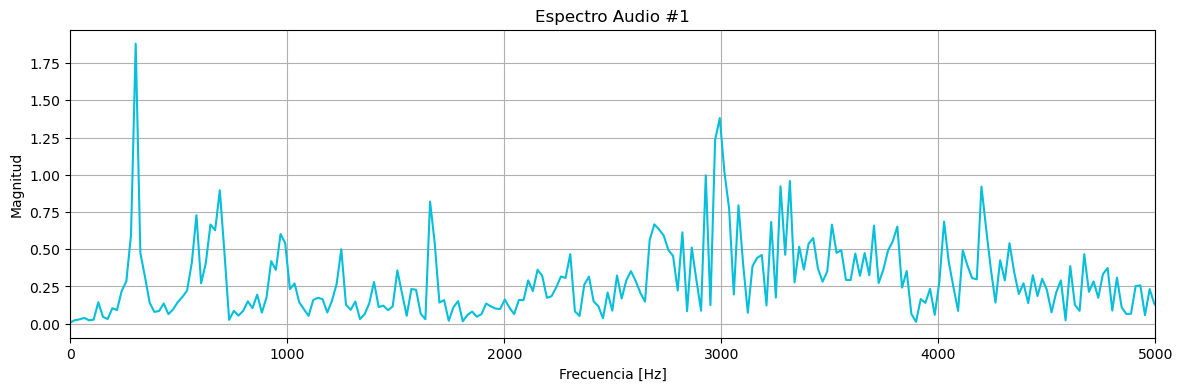

In [3]:
file_audio2=('vocc1.wav') # Se selecciona el archivo a abrir.
fs_2, Audio_2=read(file_audio2) # Se extrae la Fs y el contenido del audio.
Norm_Audio2 = Audio_2/max(abs(Audio_2)) # Se normaliza el audio.

N = 512*4

#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio2,H_audio2 = sp.freqz(Norm_Audio2,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize=(14,4))
plt.plot((W_audio2-np.pi)*fs_2/(2*np.pi),np.abs(np.fft.fftshift(H_audio2))/max(np.fft.fftshift(H_audio2)),color = '#05BFDB')
plt.axis(xmax=fs_2/2,xmin=-fs_2/2)
plt.title("Espectro Audio #1")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,5000]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()

Audio(Norm_Audio2, rate=fs_2)

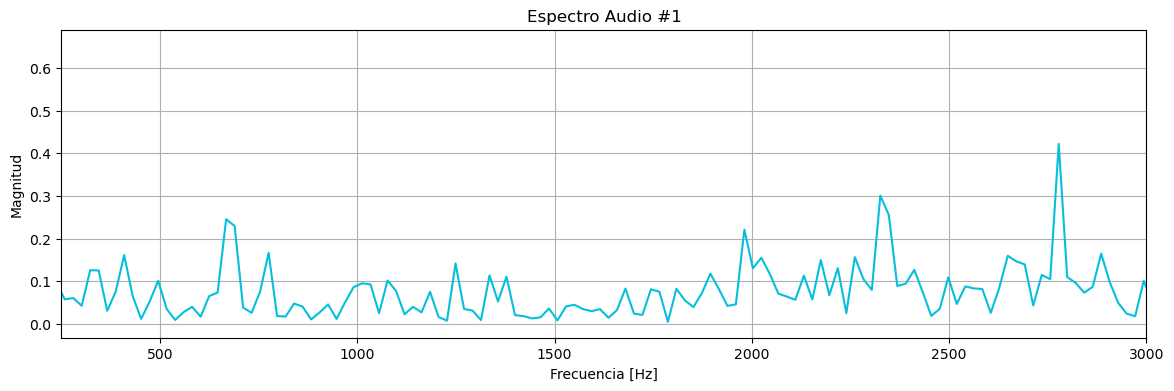

In [4]:
file_audio3=('guitar.wav') # Se selecciona el archivo a abrir.
fs_3, Audio3=read(file_audio3) # Se extrae la Fs y el contenido del audio.
Norm_Audio3 = Audio3/max(abs(Audio3)) # Se normaliza el audio.

N = 512*4

#Se calcula el comportamiento en frecuencia y se gráfica.
W_audio3,H_audio3 = sp.freqz(Norm_Audio3,1,whole=True, worN=N)

#Gráfica del comportamiento en frecuencia del audio.
plt.figure(figsize=(14,4))
plt.plot((W_audio3-np.pi)*fs_3/(2*np.pi),np.abs(np.fft.fftshift(H_audio3))/max(np.fft.fftshift(H_audio3)),color = '#05BFDB')
plt.axis(xmax=fs_3/2,xmin=-fs_3/2)
plt.title("Espectro Audio #1")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([250,3000]) #Zoom para ver solo apartir de 0
plt.grid()
plt.show()


Audio(Norm_Audio3, rate=fs_3)

In [ ]:
song =Norm_Audio1 + Norm_Audio2 + Norm_Audio3

In [ ]:
from scipy.io import wavfile

# Sumar los audios normalizados
song = Norm_Audio1 + Norm_Audio2 + Norm_Audio3

# Ruta y nombre del archivo de audio de salida
output_file = 'song6.wav'

# Obtener la tasa de muestreo del primer audio normalizado (asumiendo que todos tienen la misma tasa de muestreo)
sample_rate = wavfile.read('Ba111.wav')[0]

# Guardar el audio resultante en un archivo WAV
wavfile.write(output_file, sample_rate, song)

print(f"El archivo de audio '{output_file}' ha sido guardado exitosamente.")
Audio(song, rate=fs_1)


## Para crear el ECG

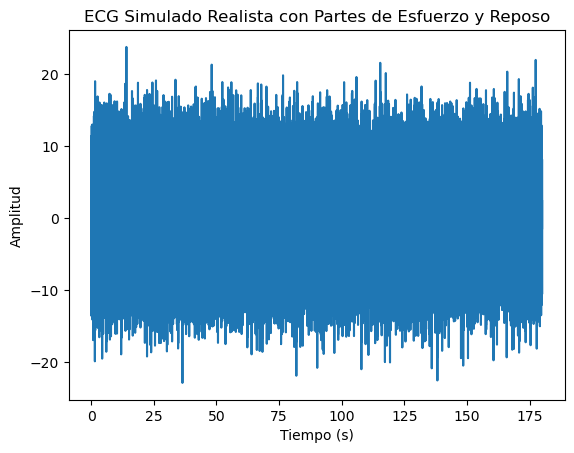

In [3]:
# Parámetros del ECG simulado
fs = 1000  # Frecuencia de muestreo en Hz
dur = 180  # Duración total del ECG en segundos
rest_duration = 60  # Duración del reposo en segundos
exer_duration = 120 # Duración del esfuerzo en segundos


# Generar señal de variabilidad de la frecuencia cardíaca
hr_rest = 60  # Frecuencia cardíaca en reposo en latidos por minuto
hr_exer = 120  # Frecuencia cardíaca durante el esfuerzo en latidos por minuto
hrv_rest = np.random.normal(0, 50, size=int(rest_duration * fs))  # Variabilidad de la frecuencia cardíaca en reposo
hrv_exer = np.random.normal(0, 50, size=int(exer_duration * fs))  # Variabilidad de la frecuencia cardíaca durante el esfuerzo
hrv = np.concatenate((hrv_rest, hrv_exer))

# Obtener el ECG simulado utilizando la función ecg de la biblioteca biosppy
ecg_simulated = hrv
t = np.arange(0, len(ecg_simulated)/fs, 1/fs)
# Escalar la señal del ECG simulado para ajustar la amplitud
ecg_simulated = 0.1 * ecg_simulated

# Graficar el ECG simulado
plt.plot(t, ecg_simulated)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('ECG Simulado Realista con Partes de Esfuerzo y Reposo')
plt.show()


In [ ]:
import numpy as np

# Supongamos que tienes los datos del ECG simulado en el arreglo "ecg_simulated"

# Guardar los datos en un archivo de texto
np.savetxt('ecg_simulated2.txt', ecg_simulated)

print("Datos del ECG simulado guardados en ecg_simulated.txt")